|Github                           | Analytics Vidhya username | Created by|
|---------------------------------|:-------------------------:|----------:|
|https://github.com/alexlrmn/Ex4  |lermna91@gmail.com         |Alex&Liad  |


# Table of contents

=================
* [Change working directory](#Change-working-directory)
* [Import libraries](#Import-libraries)
* [Load and fill train set](#Load-and-fill-train-set)
 * [Analysis](#Analysis)
     * [Univariant analysis](#Univariant-analysis)
      * [Continuous variables hist and boxplot](#Continuous-variables-hist-and-boxplot)
      * [Categorical  variables](# Categorical-variables)
 * [Preprocessing](#Preprocessing)
   * [Variable treatment 1](#Variable-treatment-1)
   * [Variable treatment 2](#Variable-treatment-2)
* [Training the Models ](#Training-the-Models)
  * [Logistic Regression](#Logistic-Regression)
  * [Decision Tree](#Decision-Tree)
  * [Random Forest](#Random-Forest)
  * [SVM](#SVM)
  * [adaBosst](#adaBoost)
  * [NB](#NB)
* [Train set handling and prediction](#Train-set-handling-and-prediction)
  * [Predict 1](#Predict-1)
  * [Predict 2](#Predict-2)
  * [Predict 3](#Predict-3)
  * [Predict 4](#Predict-4)
* [Conclusion](#Conclusion)

## Change working directory

In [3]:
import os
os.getcwd()

'C:\\Users\\Alex\\Documents'

In [4]:
cd D:/Programs/JupyterWorkspace/Loans/

D:\Programs\JupyterWorkspace\Loans


## Import libraries

In [5]:
import scipy
import pandas
import matplotlib
%pylab inline
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas.tools import plotting

Populating the interactive namespace from numpy and matplotlib


## Load and fill train set

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
df.describe()

D:\Programs\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [10]:
names = df.columns

In [11]:
names

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [12]:
df[names]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Analysis

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Univariant analysis

### Continuous variables hist and boxplot

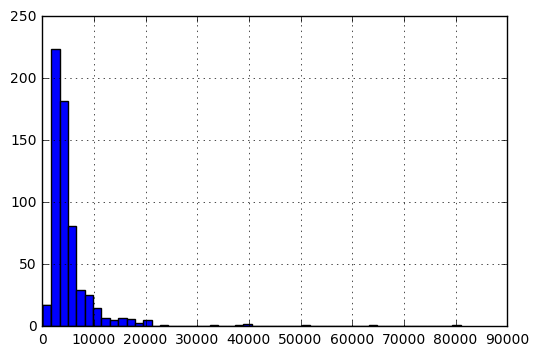

In [14]:
df['ApplicantIncome'].hist(bins=50)

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xcb085f8>],
 'caps': [<matplotlib.lines.Line2D at 0xcb1a470>,
 'fliers': [<matplotlib.lines.Line2D at 0xcb29518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xcb1af60>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc6ef320>,
  <matplotlib.lines.Line2D at 0xcb08eb8>]}

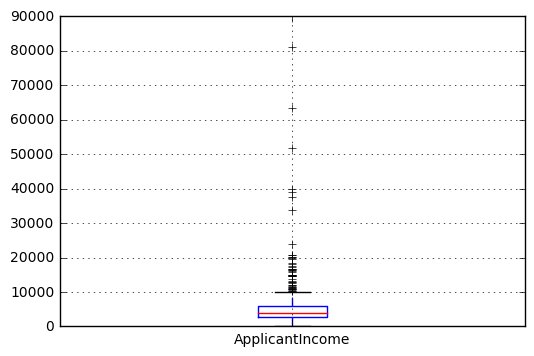

In [15]:
df.boxplot(column='ApplicantIncome')

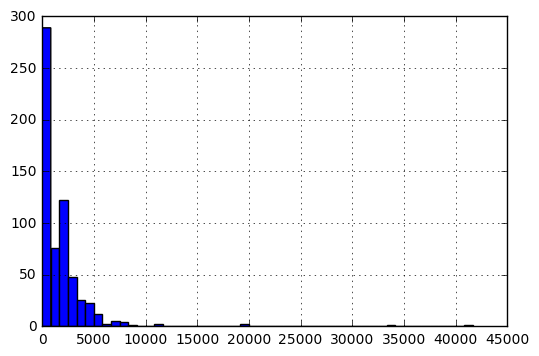

In [16]:
df['CoapplicantIncome'].hist(bins=50)

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xd1d9940>],
 'caps': [<matplotlib.lines.Line2D at 0xd22a668>,
 'fliers': [<matplotlib.lines.Line2D at 0xd2366a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd1d9780>],
 'whiskers': [<matplotlib.lines.Line2D at 0xcba3940>,
  <matplotlib.lines.Line2D at 0xd22a0f0>]}

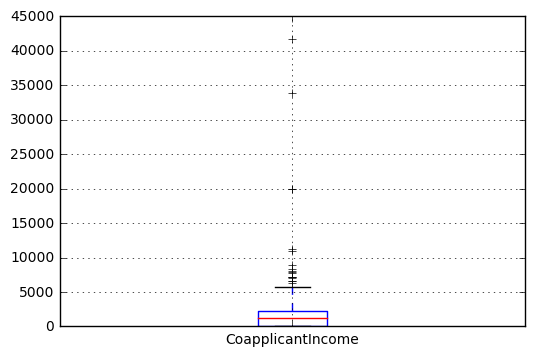

In [17]:
df.boxplot(column='CoapplicantIncome')

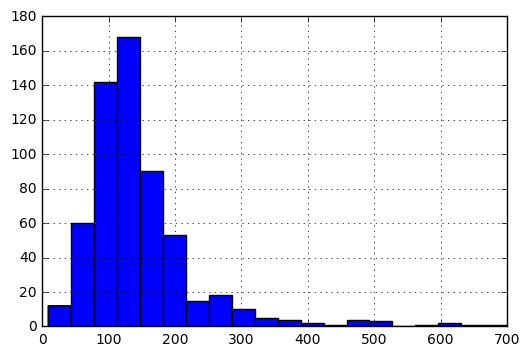

In [18]:
df['LoanAmount'].hist(bins=20)

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xf485550>],
 'caps': [<matplotlib.lines.Line2D at 0xf492278>,
 'fliers': [<matplotlib.lines.Line2D at 0xf4a1240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xf492d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0xf1bc7b8>,
  <matplotlib.lines.Line2D at 0xf485cc0>]}

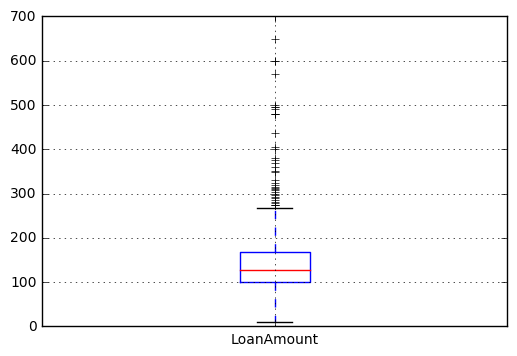

In [19]:
df.boxplot(column='LoanAmount')

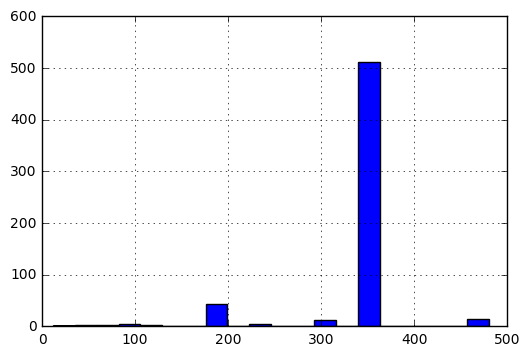

In [20]:
df['Loan_Amount_Term'].hist(bins=20)

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x119e6978>],
 'caps': [<matplotlib.lines.Line2D at 0x11a896a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a96668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119e66a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11512780>,
  <matplotlib.lines.Line2D at 0x11a89128>]}

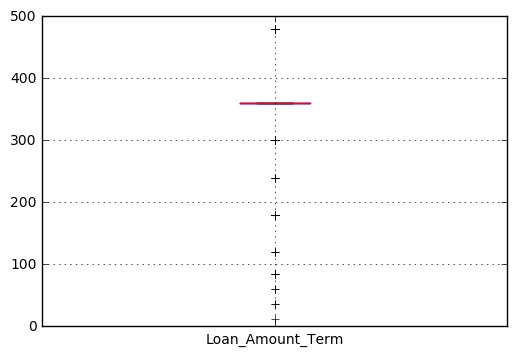

In [120]:
df.boxplot(column='Loan_Amount_Term')

## Categorical variables 

In [21]:
for name in names:
    print name

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [121]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [122]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [126]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [127]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [206]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [128]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [199]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [224]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Preprocessing

## Variable treatment 1

Create two new variables, 'ApplicantIncome_log' and 'CoapplicantIncome_log', to reduce the std of the variables and treat outliner values.

In [22]:
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'])

In [23]:
df['CoapplicantIncome_log'] = df['CoapplicantIncome'].apply(lambda x: math.log(x) if x != 0 else x)

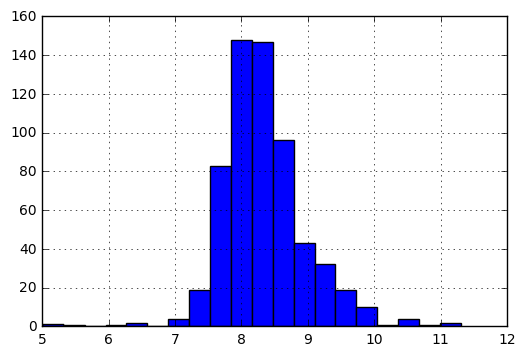

In [24]:
df['ApplicantIncome_log'].hist(bins=20)

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x176fbe48>],
 'caps': [<matplotlib.lines.Line2D at 0x1770bb70>,
 'fliers': [<matplotlib.lines.Line2D at 0x17717c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x177176a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17330240>,
  <matplotlib.lines.Line2D at 0x1770b5f8>]}

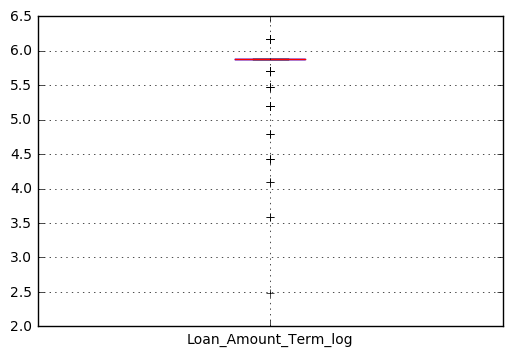

In [174]:
df.boxplot(column='Loan_Amount_Term_log')

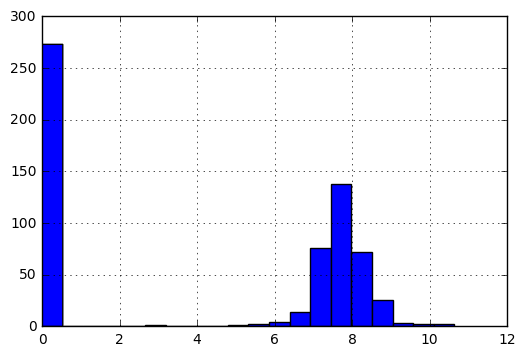

In [150]:
df['CoapplicantIncome_log'].hist(bins=20)

In [160]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_sqrt,LoanAmount_log
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,592.000000,592.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,8.341213,4.289733,11.709994,4.857444
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.645263,3.875680,3.050233,0.505142
min,150.000000,0.000000,9.000000,12.00000,0.000000,5.010635,0.000000,3.000000,2.197225
25%,2877.500000,0.000000,NaN,NaN,NaN,7.964677,0.000000,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN,8.246040,7.080284,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN,8.664750,7.739462,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,11.302204,10.637465,26.457513,6.551080


In [25]:
df['LoanAmount_sqrt'] = np.sqrt(df['LoanAmount'])

Create variable 'LoanAmount_log' to try and reduce std of 'LoanAmount'

In [26]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

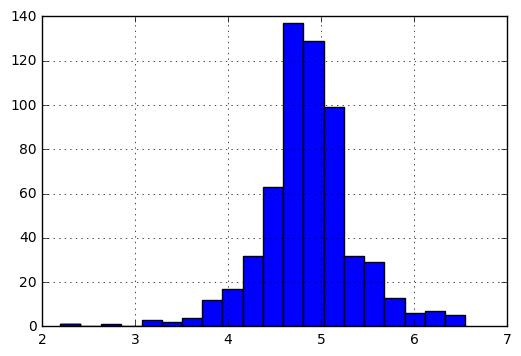

In [297]:
df['LoanAmount_log'].hist(bins=20)

## Check amount of NaN is each column

In [32]:
df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID                   0
Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed            32
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term          0
Credit_History           50
Property_Area             0
Loan_Status               0
ApplicantIncome_log       0
CoapplicantIncome_log     0
LoanAmount_sqrt          22
LoanAmount_log            0
Total_log                 0
dtype: int64

## Fill missing values

In [29]:
df['LoanAmount_log'].fillna(np.mean(df['LoanAmount_log']), inplace=True)

In [30]:
df['Loan_Amount_Term'].fillna(360.0, inplace=True)

Create new Feature: Total_log, feature includes the log value of the addition between 'ApplicantIncome' and 'CoapplicantIncome'.
Because CoapplicantIncome had some 0 values, a log wasn't a good idea, we dicided that the Total_log will be a better option.

In [31]:
df['Total_log'] = np.log(df['ApplicantIncome'] + df['CoapplicantIncome'])

## Fill Gender, Married, Dependents, Self_Employed, Credit_History

In [33]:
gender_marriege = pd.crosstab(df['Gender'], df['Married'])

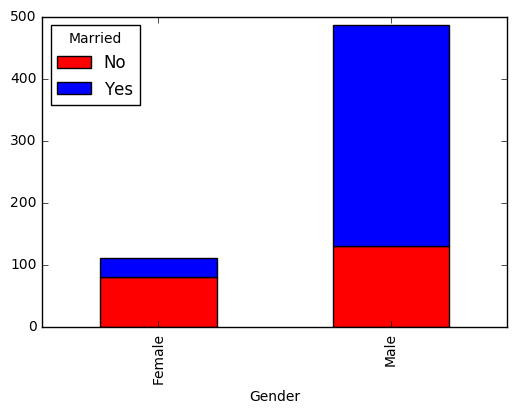

In [34]:
gender_marriege.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

In [35]:
def checkStatus(x):
    if (x['Married'] == 'Yes'):
        return 'Male'
    return 'Female'
    
df['Gender'].fillna(df[df['Gender'].isnull()].apply(checkStatus, axis=1), inplace=True)

In [36]:
def CheckGender(x):
    if x['Gender'] == 'Male':
        return 'Yes'
    return 'No'
df['Married'].fillna(df[df['Married'].isnull()].apply(CheckGender, axis=1), inplace=True)

Most of Credit_History value are 1, fill missing values with 1

In [37]:
df['Credit_History'].fillna('1', inplace=True)

In [38]:
df['Self_Employed'].fillna('No', inplace=True)

Fill missing values of Dependets with -1, new category

In [39]:
df['Dependents'].fillna('-1', inplace=True)

## Convert into numeric


In [86]:
df.dtypes

Loan_ID                   object
Gender                     int64
Married                    int64
Dependents                 int64
Education                  int64
Self_Employed              int64
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History            object
Property_Area              int64
Loan_Status               object
ApplicantIncome_log      float64
CoapplicantIncome_log    float64
LoanAmount_sqrt          float64
LoanAmount_log           float64
Total_log                float64
dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

## Variable treatment 2

In [191]:
df = pandas.read_csv('train.csv')

In [241]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Gender_Female,Gender_Unknown
0,LP001002,Male,0,0,0,0,5849,0.0,NaN,360.0,1,2,Y,1,0,0
1,LP001003,Male,1,1,0,0,4583,1508.0,128.0,360.0,1,0,N,1,0,0
2,LP001005,Male,1,0,0,1,3000,0.0,66.0,360.0,1,2,Y,1,0,0
3,LP001006,Male,1,0,1,0,2583,2358.0,120.0,360.0,1,2,Y,1,0,0
4,LP001008,Male,0,0,0,0,6000,0.0,141.0,360.0,1,2,Y,1,0,0
5,LP001011,Male,1,2,0,1,5417,4196.0,267.0,360.0,1,2,Y,1,0,0
6,LP001013,Male,1,0,1,0,2333,1516.0,95.0,360.0,1,2,Y,1,0,0
7,LP001014,Male,1,3,0,0,3036,2504.0,158.0,360.0,0,1,N,1,0,0
8,LP001018,Male,1,2,0,0,4006,1526.0,168.0,360.0,1,2,Y,1,0,0
9,LP001020,Male,1,1,0,0,12841,10968.0,349.0,360.0,1,1,N,1,0,0


In [284]:
df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID                  0
Gender                  13
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Gender_Male              0
Gender_Female            0
Gender_Unknown           0
Total_log                0
LoanAmount_log           0
Loan_Amount_Term_log     0
dtype: int64

In [285]:
df.dtypes

Loan_ID                  object
Gender                   object
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History           object
Property_Area             int64
Loan_Status              object
Gender_Male               int64
Gender_Female             int64
Gender_Unknown            int64
Total_log               float64
LoanAmount_log          float64
Loan_Amount_Term_log    float64
dtype: object

Create new columns from Gender column

In [195]:
df['Gender_Male'] = df.apply(lambda x: 1 if x['Gender'] == 'Male' else 0, axis=1)
df['Gender_Female'] = df.apply(lambda x: 1 if x['Gender'] == 'Female' else 0, axis = 1)
df['Gender_Unknown'] = df.apply(lambda x: 1 if x['Gender'] != 'Male' and x['Gender'] != 'Female' else 0, axis = 1)

In [233]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))
    
df['Credit_History'].fillna('2.0', inplace=True)

In [267]:
df['LoanAmount'].fillna(np.mean(df['LoanAmount']), inplace=True)

In [269]:
df['Loan_Amount_Term'].fillna(360.0, inplace=True)

In [265]:
df['Total_log'] = np.log(df['ApplicantIncome'] + df['CoapplicantIncome'])

In [280]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [282]:
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'])

# Training the Models

Target variable

In [423]:
outcome_var = 'Loan_Status'

Import models from scikit learn module

In [422]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

# Logistic Regression

In [104]:
model = LogisticRegression()

predictor_var = ['Credit_History', 'Total_log']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [431]:
model = LogisticRegression()
predictor_var = ['Total_log','Credit_History', 'LoanAmount_log','Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


# Decision Tree

In [433]:
model = DecisionTreeClassifier()
predictor_var = ['Married', 'Credit_History',  'Gender_Male', 'Gender_Female', 'Gender_Unknown']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 81.110%


In [344]:
predictor_var = ['Total_log','Credit_History', 'LoanAmount_log','Dependents', 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 67.917%


# Random Forest

In [337]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=25, max_depth=7, max_features=6, n_jobs=-1)
predictor_var = ['Married', 'Dependents', 'Education',
                'Self_Employed', 'LoanAmount_log','Loan_Amount_Term_log',
                'Credit_History', 'Property_Area', 'Total_log', 'Gender_Male', 'Gender_Female', 'Gender_Unknown']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.248%
Cross-Validation Score : 79.482%


#### Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

In [435]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=25, max_depth=7, max_features=1, n_jobs=-1)
predictor_var = ['Married', 'Credit_History',  'Gender_Male', 'Gender_Female', 'Gender_Unknown']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 80.946%


## KNN


In [430]:
from sklearn import neighbors
import itertools
n_neighbors = 15

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    model = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    predictor_var = ['Married', 'Credit_History', 'Gender_Male', 'Gender_Female', 'Gender_Unknown']
    classification_model(model, df, predictor_var,outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 80.946%
Accuracy : 81.107%
Cross-Validation Score : 81.110%


## adaBoost

In [417]:
from sklearn import grid_search
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn_params = {
    'n_neighbors' : [3, 39],
    'weights': ['uniform', 'distance']
    
}

#svr = svm.SVC()
model = grid_search.GridSearchCV(knn, knn_params)

predictor_var = ['Married', 'Credit_History',  'Gender_Male', 'Gender_Female', 'Gender_Unknown']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 81.110%


## SVM

In [1]:
from sklearn import svm


# Linear kernel
model = svm.SVC(kernel='rbf') 
predictor_var = ['Total_log','Credit_History', 'Property_Area', 'LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)
# polynomial kernel
#svc = svm.SVC(kernel='poly', degree=3)  # degree: polynomial degree
# RBF kernel (Radial Basis Function)
# svc = svm.SVC(kernel='rbf')  # gamma: inverse of size of radial kernel

NameError: name 'classification_model' is not defined

## NB

In [439]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
predictor_var =  ['Married', 'Credit_History',  'Gender_Male', 'Gender_Female', 'Gender_Unknown']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 78.664%
Cross-Validation Score : 76.717%


## Train set handling and prediction

### Predict 1

Description: After applying Variable Treatment #1, We used the Random Forest algorithm to get 5 feature which have highest effect on the target variable, and used those features for prediction with verious models, unfortunatly we didn't take screeshots of those results when we uploaded them, but the average accuracy rate was around 77%.

### Predict 2

For here on we use the Variable Treatment #2, which replaced the Gender variable with 3 new variables: Gender_Male, Gender_Female and Gender_unknown, it seems that from using crosstab plot that there might be some correlation between the being married and the Gender, So we decided to pick the new Gender variables with the married variable and Credit_History variable which had the most effect on the target variable according to the Random Forest algorithm, and use those 5 as features for prediction

In [33]:
gender_marriege = pd.crosstab(df['Gender'], df['Married'])

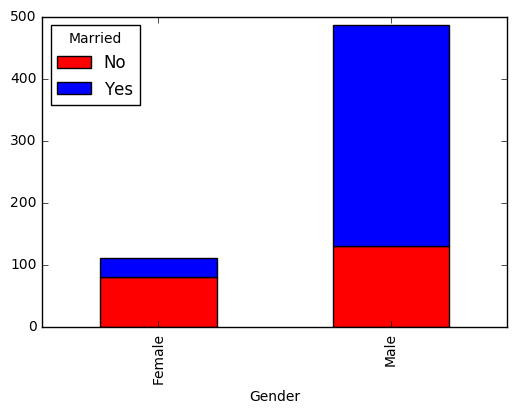

In [34]:
gender_marriege.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

In [184]:
df_test = pd.read_csv('test.csv')

In [185]:
df_test.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [186]:
def test_fillup(df_test, df):
    # Create Features: Total_log, LoanAmount_log
    df_test['Total_log'] = np.log(df['ApplicantIncome'] + df['CoapplicantIncome'])
    df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
    
    
    # Fill: gender, Dependents, Self_Employed, LoanAmountLog, Loan_Amount_Term and Credit_History
    df_test['Gender'].fillna(df_test[df_test['Gender'].isnull()].apply(checkStatus, axis=1), inplace=True)
    df_test['Dependents'].fillna('-1', inplace=True)
    df_test['Self_Employed'].fillna('No', inplace=True)
    df_test['Credit_History'].fillna('1', inplace=True)
    df_test['Loan_Amount_Term'].fillna(360.0, inplace=True)
    df_test['LoanAmount_log'].fillna(np.mean(df['LoanAmount_log']), inplace=True)
    

Fill missing values in test set using train set

In [187]:
test_fillup(df_test,df)

Change Features to numeric

In [188]:
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i].astype(str))

After running the Decision Tree algorithm, we apply the model on the training set for prediction

In [327]:
df_test['Loan_Status'] = model.predict(df_test[predictor_var])

In [328]:
df_test[['Loan_ID', 'Loan_Status']].to_csv('sample_submission.csv', sep=',', index=False)

#### Result for prediction with Decition Tree with the following Features: 

* Credit_History
* Married
* Gender_Male
* Gender_Female
* Gender_Unknown

![Predict#1](images/DT_['Credit_History','Married', 'Gender_Male', 'Gender_Female', 'Gender_Unknown'].PNG)

### Predict 3

#### Result for prediction with KNN using 27 nearest neighbors with the following Features: 

We used adaBoost to check virious parameters, and around 27 neighbors had the best results
* Married
* Credit History
* Gender_Male
* Gender_Female
* Unknown

![Predict#2](images/KNN_27_['Married', 'Credit_History',  'Gender_Male', 'Gender_Female', 'Gender_Unknown'].PNG)

### Predict 4

Using 5 classifier(LogicRegression, DT, RF, SVM,NB) to form an ensamble using different features, for SVM and DT we used the 5 features from Prediction #2 and #3, and for the rest of the classifiers we used the 4 top feature from the Random Forest ranker

In [291]:
df_test = pd.read_csv('test.csv')

# Add new Columns
df_test['Gender_Male'] = df_test.apply(lambda x: 1 if x['Gender'] == 'Male' else 0, axis=1)
df_test['Gender_Female'] = df_test.apply(lambda x: 1 if x['Gender'] == 'Female' else 0, axis = 1)
df_test['Gender_Unknown'] = df_test.apply(lambda x: 1 if x['Gender'] != 'Male' and x['Gender'] != 'Female' else 0, axis = 1)
from sklearn.preprocessing import LabelEncoder
var_mod = ['Married', 'Dependents', 'Education', 'Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i].astype(str))
    
df_test['Credit_History'].fillna('2.0', inplace=True)
df_test['LoanAmount'].fillna(np.mean(df['LoanAmount']), inplace=True)
df_test['Loan_Amount_Term'].fillna(360.0, inplace=True)
df_test['Total_log'] = np.log(df_test['ApplicantIncome'] + df_test['CoapplicantIncome'])
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])
df_test['Loan_Amount_Term_log'] = np.log(df_test['Loan_Amount_Term'])

In [418]:
df_test['Loan_Status'] = model.predict(df_test[predictor_var])

In [480]:
df_test[['Loan_ID', 'Loan_Status']].to_csv('sample_submission.csv', sep=',', index=False)

Logic regression prediction

In [432]:
df_test['Loan_Status_Logic'] = model.predict(df_test[predictor_var])

Decision tree prediction

In [434]:
df_test['Loan_Status_DT'] = model.predict(df_test[predictor_var])

Random forest prediction

In [436]:
df_test['Loan_Status_RF'] = model.predict(df_test[predictor_var])

SVM prediction

In [438]:
df_test['Loan_Status_SVM'] = model.predict(df_test[predictor_var])

Naive bayes prediction

In [440]:
df_test['Loan_Status_NB'] = model.predict(df_test[predictor_var])

In [479]:
df_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Gender_Unknown,Total_log,LoanAmount_log,Loan_Amount_Term_log,Loan_Status,Loan_Status_Logic,Loan_Status_DT,Loan_Status_RF,Loan_Status_SVM,Loan_Status_NB
0,LP001015,Male,1,0,0,0,5720,0,110.0,360.0,...,0,8.651724,4.700480,5.886104,Y,Y,Y,Y,Y,Y
1,LP001022,Male,1,1,0,0,3076,1500,126.0,360.0,...,0,8.428581,4.836282,5.886104,Y,Y,Y,Y,Y,Y
2,LP001031,Male,1,2,0,0,5000,1800,208.0,360.0,...,0,8.824678,5.337538,5.886104,Y,Y,Y,Y,Y,Y
3,LP001035,Male,1,2,0,0,2340,2546,100.0,360.0,...,0,8.494129,4.605170,5.886104,Y,Y,Y,Y,Y,Y
4,LP001051,Male,0,0,1,0,3276,0,78.0,360.0,...,0,8.094378,4.356709,5.886104,Y,Y,Y,Y,Y,Y
5,LP001054,Male,1,0,1,1,2165,3422,152.0,360.0,...,0,8.628198,5.023881,5.886104,Y,Y,Y,Y,Y,Y
6,LP001055,Female,0,1,1,0,2226,0,59.0,360.0,...,0,7.707962,4.077537,5.886104,Y,Y,Y,Y,Y,Y
7,LP001056,Male,1,2,1,0,3881,0,147.0,360.0,...,0,8.263848,4.990433,5.886104,N,N,N,N,N,N
8,LP001059,Male,1,2,0,2,13633,0,280.0,240.0,...,0,9.520249,5.634790,5.480639,Y,Y,Y,Y,Y,Y
9,LP001067,Male,0,0,1,0,2400,2400,123.0,360.0,...,0,8.476371,4.812184,5.886104,Y,Y,Y,Y,Y,Y


Ensamble function

In [477]:
def Ensamble(df_test):
    predictions = ['Loan_Status_Logic', 'Loan_Status_DT', 'Loan_Status_RF', 'Loan_Status_SVM', 'Loan_Status_NB']
    rows_vote = df_test.apply(lambda x: 'Y' if len(filter(lambda y: y=='Y', x[predictions])) > len(filter(lambda y: y=='N', x[predictions])) else 'N', axis=1)
    return rows_vote

Combine the prediction and write to file

In [478]:
df_test['Loan_Status'] = Ensamble(df_test)

In [482]:
df_test[['Loan_ID', 'Loan_Status']].to_csv('sample_submission.csv', sep=',', index=False)

![Prediction#3](images/Ensamble.PNG)

## Conclusion

Although some variable like LoanTerm, Dependents and Property_Area are the more likely variables that we would think that should effect the final Loan_Status for an applicant, it seems that there are other variables that can predict the outcome better, although the accuracy rate is just a couple percent higher, it can point to a problem in our society on how decision like this are make.